一个简单的例子，线性模型$y = \alpha  + \beta x$的拟合

# 生成数据

In [1]:
#导入模块
import numpy as np

In [2]:
x = np.random.random(30)
x

array([0.95368104, 0.80492002, 0.10423788, 0.3938102 , 0.42479412,
       0.73810132, 0.26135347, 0.08222948, 0.46155981, 0.24986903,
       0.12220917, 0.45760443, 0.40322561, 0.64141753, 0.19806553,
       0.9990956 , 0.4980831 , 0.50046251, 0.37857936, 0.36361657,
       0.60374452, 0.83847713, 0.93301178, 0.46894614, 0.76178984,
       0.46962464, 0.08080696, 0.0086308 , 0.16600824, 0.26130495])

In [3]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [4]:
x = 10 * x
x

array([9.53681039, 8.0492002 , 1.0423788 , 3.93810196, 4.24794123,
       7.38101321, 2.61353469, 0.82229476, 4.61559806, 2.49869033,
       1.22209173, 4.57604431, 4.03225615, 6.41417535, 1.9806553 ,
       9.99095604, 4.98083099, 5.00462505, 3.7857936 , 3.63616574,
       6.03744522, 8.38477128, 9.33011775, 4.6894614 , 7.61789839,
       4.69624636, 0.80806964, 0.08630799, 1.66008238, 2.6130495 ])

In [5]:
y = 20*x + 3
y

array([193.73620788, 163.98400402,  23.84757601,  81.76203925,
        87.95882455, 150.62026412,  55.2706938 ,  19.44589521,
        95.31196129,  52.97380668,  27.44183468,  94.52088622,
        83.64512295, 131.28350691,  42.61310607, 202.81912088,
       102.61661972, 103.09250102,  78.71587192,  75.72331487,
       123.74890441, 170.69542554, 189.60235502,  96.78922792,
       155.35796788,  96.92492723,  19.16139279,   4.72615978,
        36.20164757,  55.26098998])

增加扰动项：$y = ax + b + \varepsilon $

In [6]:
y = 20 * x + 3 + np.random.randn(30)
y

array([192.61459537, 165.182298  ,  22.65364084,  81.65593491,
        86.94623797, 151.20003776,  54.37607197,  20.52628241,
        94.2207789 ,  53.42328797,  28.91555416,  94.66706783,
        84.21571599, 131.53771554,  43.05561209, 203.5880042 ,
       103.29440033, 103.54614998,  79.27187136,  75.22566337,
       123.4454525 , 170.05482079, 189.42339977,  96.11230857,
       155.7569352 ,  95.31050005,  17.85389811,   4.6542803 ,
        36.88362012,  55.29158766])

# 绘制散点图 

In [7]:
from plotnine import *
import pandas as pd
%matplotlib inline

In [8]:
x_y = pd.DataFrame({'x':x, 'y':y})
x_y.sample(10)

,x,y
7,0.822295,20.526282
2,1.042379,22.653641
1,8.049200,165.182298
5,7.381013,151.200038
15,9.990956,203.588004
9,2.498690,53.423288
10,1.222092,28.915554
22,9.330118,189.423400
29,2.613049,55.291588
27,0.086308,4.654280


In [9]:
x_y.describe()

,x,y
count,30.000000,30.000000
mean,4.543087,93.830124
std,2.802947,56.073150
min,0.086308,4.654280
25%,2.527280,53.661484
50%,4.411993,90.583508
75%,6.319993,129.514650
max,9.990956,203.588004


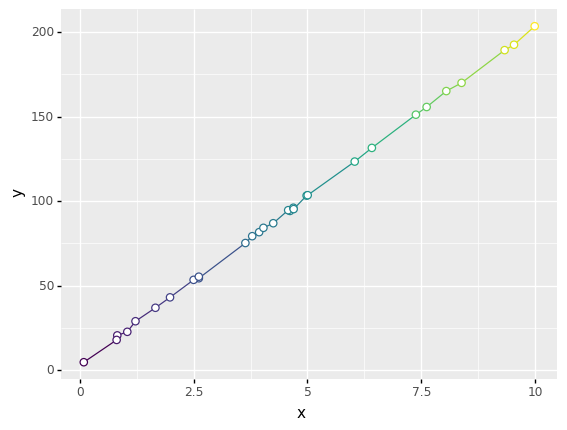

<ggplot: (138863812063)>

In [10]:
(
    ggplot(x_y, aes(x='x', y='y', colour='x+y')) +
    geom_line() +
    geom_point(fill='white', size=2.5) +
    theme(legend_position='none')
)

# 模型拟合

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()

In [13]:
x = x.reshape(-1, 1)

In [14]:
reg.fit(x, y)

LinearRegression()

In [15]:
print("Fitted lm model is y={:.3}x+{:.3}".format(reg.coef_[0], reg.intercept_))

Fitted lm model is y=20.0x+2.96


# 拟合效果

In [16]:
yhat = reg.predict(x)
yhat

array([193.71929142, 163.9627091 ,  23.80565804,  81.7286442 ,
        87.92634145, 150.59700254,  55.23340018,  19.40332946,
        95.28056031,  52.93617503,  27.40044565,  94.48936882,
        83.61200503, 131.25739965,  42.57394971, 202.8035411 ,
       102.58629372, 103.06224506,  78.68202859,  75.68903114,
       123.72168833, 170.6751183 , 189.5848302 ,  96.75804434,
       155.33540351,  96.89376362,  19.11878517,   4.68142782,
        36.16154766,  55.22369492])

In [17]:
x_y_yhat = pd.DataFrame({'x':x.flatten(), 'y':y, 'yhat':yhat})

In [18]:
x_y_yhat_melt = pd.melt(x_y_yhat, id_vars='x', var_name='y_type', value_name='value')
x_y_yhat_melt.sample(10)

,x,y_type,value
5,7.381013,y,151.200038
16,4.980831,y,103.294400
41,4.576044,yhat,94.489369
44,1.980655,yhat,42.573950
27,0.086308,y,4.654280
38,4.615598,yhat,95.280560
42,4.032256,yhat,83.612005
52,9.330118,yhat,189.584830
10,1.222092,y,28.915554
50,6.037445,yhat,123.721688


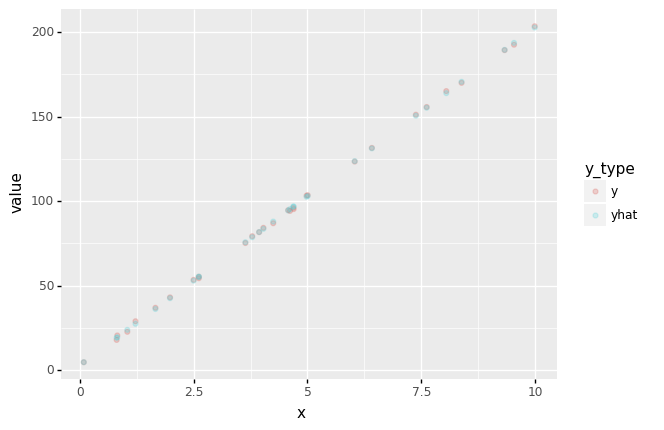

<ggplot: (138864449588)>

In [19]:
(
    ggplot(x_y_yhat_melt, aes(x='x', y='value', colour='y_type')) +
    geom_point(alpha=0.25)
)

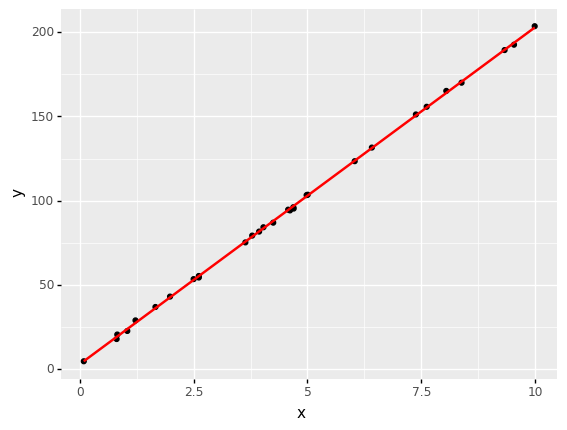

<ggplot: (138864330849)>

In [20]:
(
    ggplot(x_y, aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method='lm', color='red')
)

In [21]:
from statsmodels.api import OLS

In [22]:
lm2 = OLS(x, y).fit()

In [23]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.147e+05
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                    1.02e-53
Time:                        16:48:30   Log-Likelihood:                          31.568
No. Observations:                  30   AIC:                                     -61.14
Df Residuals:                      29   BIC:                                     -59.74
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0488      0.000    338.662      0.000       0.049       0.049
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.106
Skew:                           0.037   Prob(JB):                        0.948
Kurtosis:                       2.719   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""